<a href="https://colab.research.google.com/github/anishjohnson/Shopsy_reviews_sentiment_analysis/blob/main/Shopsy_reviews_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Objective: Make a python script which fetches the App reviews(500 latest ones) for any app that you like and do a basic sentiment analysis on those reviews.

In [1]:
# We will use the google-play-scraper to extract reviews from google play store.
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import required libraries to fetch data.
from google_play_scraper import app, reviews, Sort

### For the sentiment analysis we will use the user reviews for **Shopsy**, which is a newly launched app by **Flipkart**. It provides several exciting offers and products for cheap price. Lets perform an sentiment analysis and find out what most of the people think of this app.

In [3]:
# Fetch the reviews.
result, continuation_token = reviews('com.flipkart.shopsy',
                                    lang='en',
                                    country='us',
                                    sort = Sort.NEWEST,
                                    count = 500)

result, _ = reviews('com.flipkart.shopsy', 
                   continuation_token = continuation_token)

### **Lets Start:**

In [4]:
# Import basic python libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)

import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Create a dataframe to store the data.
reviews_df = pd.DataFrame(result)
reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,e5115b34-ad61-42d8-8d56-6446e68a0704,Shivam Raj,https://play-lh.googleusercontent.com/a-/AFdZu...,super app,3,0,7.17,2022-09-05 11:31:31,Thanks for the positive comment. We see that y...,2022-09-06 02:43:00
1,72b72314-71d3-4d12-b042-e9446e6384ff,Lavanya Wakle,https://play-lh.googleusercontent.com/a/AItbvm...,😇😇😇☺☺☺☺😃😃😃😃,5,0,None,2022-09-05 11:30:12,Thanks for your review. Your kind words really...,2022-09-06 03:04:37
2,43bd0772-5d30-4f43-a585-dfbe3c146423,Niraj Yadav,https://play-lh.googleusercontent.com/a/AItbvm...,fine,5,0,7.17,2022-09-05 11:28:56,"Hi, thanks for the 5 star rating. Hope you con...",2022-09-06 03:04:39
3,1a9842bb-e329-49ec-8c91-33c20aa49600,surjeet singh,https://play-lh.googleusercontent.com/a-/AFdZu...,good,4,0,7.17,2022-09-05 11:28:55,"Hi, thanks for taking out time to rate us. It ...",2022-09-06 03:04:40
4,a7ed8494-3aef-468f-8201-9da528db1a00,Golu Kashsyap,https://play-lh.googleusercontent.com/a/AItbvm...,op,1,0,7.17,2022-09-05 11:28:37,Thanks for the positive comment. We see that y...,2022-09-06 02:43:01


**Lets just select the required features and drop rest of them.**

In [5]:
reviews_df = reviews_df.drop(columns=['userName', 'userImage', 'thumbsUpCount',	'reviewCreatedVersion', 'at', 'replyContent',	'repliedAt'])

In [6]:
# Get info about the dataset.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  500 non-null    object
 1   content   500 non-null    object
 2   score     500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [7]:
# Get some stats about the dataset.
reviews_df.describe(include='all')

,reviewId,content,score
count,500,500,500.000000
unique,500,301,NaN
top,e5115b34-ad61-42d8-8d56-6446e68a0704,good,NaN
freq,1,68,NaN
mean,NaN,NaN,4.062000
std,NaN,NaN,1.443025
min,NaN,NaN,1.000000
25%,NaN,NaN,3.750000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


In [8]:
# Check if there are any null values.
reviews_df.duplicated().value_counts()

False    500
dtype: int64

### **Now lets start with Exploratory Data Analysis:**

In [9]:
reviews_df.head()

,reviewId,content,score
0,e5115b34-ad61-42d8-8d56-6446e68a0704,super app,3
1,72b72314-71d3-4d12-b042-e9446e6384ff,😇😇😇☺☺☺☺😃😃😃😃,5
2,43bd0772-5d30-4f43-a585-dfbe3c146423,fine,5
3,1a9842bb-e329-49ec-8c91-33c20aa49600,good,4
4,a7ed8494-3aef-468f-8201-9da528db1a00,op,1


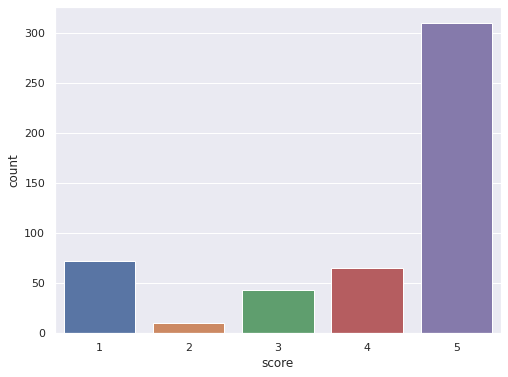

In [10]:
# What are the most popular scores recieved by the app.
sns.countplot(reviews_df.score)
plt.show()

* **Most of the users have rated it as 5 which is good for a recently launched app.**
* **2 is the least given rating**

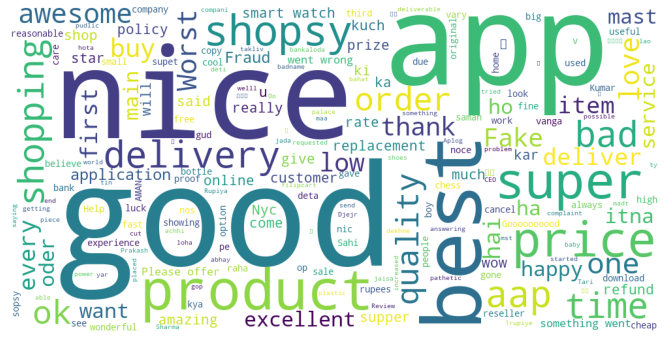

In [11]:
# Lets see if there are any particular words being used for the reviews.
from wordcloud import WordCloud
reviews = ' '.join([text for text in reviews_df['content']])
wordcloud = WordCloud(width=1000, height=500, background_color ='white').generate(reviews)
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **Looking at the mostly repeated words used in the user reviews we can observe that people are happy with the app.**
* **The top 5 words include Good, Super, Nice, Best, price.**

### **Text Preprocessing:**

Steps:

1. Clean the tweets by removing any usernames, links, emojis.
2. Remove Punctuations and Special Characters
3. Remove the Stopwords

In [12]:
# Before we start with sentiment analysis lets preprocess the data so it can be used by the model.
# https://drive.google.com/open?id=1G1vIkkbqPBYPKHcQ8qy0G2zkoab2Qv4v
# Lets start by cleaning the reviews.
# !pip install emot

import re
import pickle

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [13]:
reviews_df['cleaned_data'] = reviews_df['content'].apply(convert_emojis_to_word)

In [14]:
reviews_df.head()

,reviewId,content,score,cleaned_data
0,e5115b34-ad61-42d8-8d56-6446e68a0704,super app,3,super app
1,72b72314-71d3-4d12-b042-e9446e6384ff,😇😇😇☺☺☺☺😃😃😃😃,5,smiling_face_with_halosmiling_face_with_halosm...
2,43bd0772-5d30-4f43-a585-dfbe3c146423,fine,5,fine
3,1a9842bb-e329-49ec-8c91-33c20aa49600,good,4,good
4,a7ed8494-3aef-468f-8201-9da528db1a00,op,1,op


In [15]:
# Remove punctuations. 
def remove_punctuation(tweets):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return tweets.translate(translator)

reviews_df['cleaned_data'] = reviews_df['cleaned_data'].apply(remove_punctuation)
reviews_df.cleaned_data.head(5)

0                                            super app
1    smilingfacewithhalosmilingfacewithhalosmilingf...
2                                                 fine
3                                                 good
4                                                   op
Name: cleaned_data, dtype: object

In [16]:
# Remove stopwords.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')


# Creating a function to remove stop words from the reviews.
def stopword(text):
    # Lowercasing the words and removing stop words.
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

reviews_df['cleaned_data'] = reviews_df['cleaned_data'].apply(stopword)
reviews_df.cleaned_data.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0                                            super app
1    smilingfacewithhalosmilingfacewithhalosmilingf...
2                                                 fine
3                                                 good
4                                                   op
Name: cleaned_data, dtype: object

### **Classifying Reviews:**

In [23]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment

reviews_df['sentiment'] = reviews_df['score'].apply(lambda rating : +1 if rating >= 3 else -1)

In [24]:
reviews_df.sentiment.value_counts()

 1    418
-1     82
Name: sentiment, dtype: int64

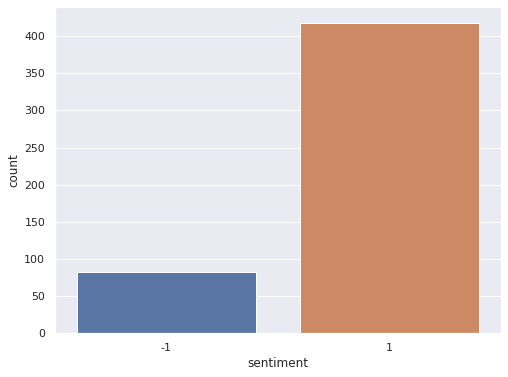

In [25]:
sns.countplot(reviews_df.sentiment)
plt.show()

**The above plot shows that most of the reviews recieved by our app is positive.**

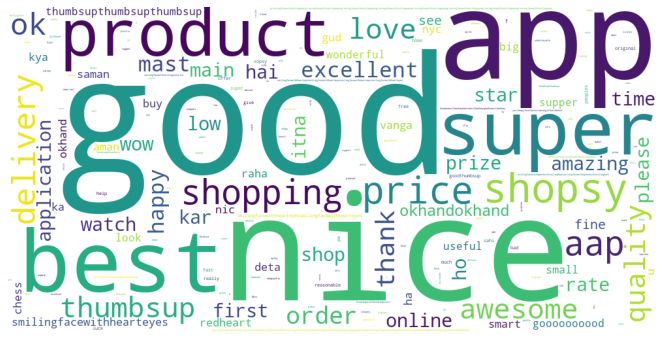

In [26]:
# Lets see the most repeated words in each class.

# Most common words in positive reviews.
pos = ' '.join([text for text in reviews_df['cleaned_data'][reviews_df['sentiment'] == 1]])
wordcloud = WordCloud(width=1000, height=500, background_color ='white').generate(pos)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

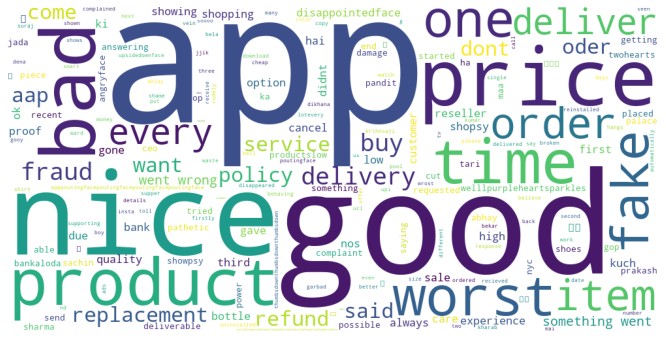

In [27]:
# Most common words in negative reviews.

neg = ' '.join([text for text in reviews_df['cleaned_data'][reviews_df['sentiment'] == -1]])
wordcloud = WordCloud(width=1000, height=500, background_color ='white').generate(neg)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Make Predictions:**

**Since there is a class imbalance present as most of the reviews recieved by the app are positive we will have to oversample the data to avoid biasness.**

In [54]:
# Split the data into train and test sets.
X = reviews_df['cleaned_data']
y = reviews_df['sentiment']

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [55]:
# Required libraries.
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import ComplementNB
from imblearn.over_sampling import SMOTE

In [56]:
# Create the pipeline for building model.
textclassifier =Pipeline([
  ('vect', CountVectorizer()),
   ('tfidf', TfidfTransformer()),
   ('smote', SMOTE(random_state=12)),
   ('cnb', ComplementNB())
])

In [57]:
textclassifier.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('smote', SMOTE(random_state=12)), ('cnb', ComplementNB())])

In [63]:
y_pred = textclassifier.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
 
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print("Confusion Matrix: \n", cm,"\n", "Accuracy: ",  ac)

Confusion Matrix: 
 [[12  8]
 [27 78]] 
 Accuracy:  0.72


In [69]:
# Now lets test the model using random review.
textclassifier.predict(['The app was very slow and buggy....👎😡'])

array([-1])

In [73]:
textclassifier.predict(['The app is very good, discounts are also very good.'])

array([1])

**As we can see from above the model is able to predict the sentiment of the review using the Component Naive Bayes Classifier.**

### **Conclusions:**

* The data was extracted from google playstore for the Shopsy app which is an ecommerce application by Flipkart.

* Total 500 user reviews were collected.

* Basic EDA was done to find the trends and patterns in the data. We found that most of the users have rated it as 5 which is good for a recently launched app and 2 is the least given rating.

* The top 5 words in all the reviews include Good, Super, Nice, Best, price.

* Most of the reviews are positive and only few are negative. This makes sense as most of the reviews recieved 5 as the rating. This also indicated class imbalance.

* This data was then preprocessed to remove puntucations, stopwords and emojis.

* The preprocessed data was pass through a pipeline which converted the data from text to numeric so that the model can be trained on it.

* We used Component Naive Bayes Classifier since it works well with imbalanced data.

* The trained model obtained 72% accuracy on the test set.

* Hence it can be concluded that the model is able to predict the sentiment of a given review.